## 기본 설정

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import font_manager, rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

## display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_seq_items', None)

In [3]:
df = pd.read_csv("Levels_Fyi_Salary_Data.csv")
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [4]:
df.shape

(62642, 29)

### 파생 변수

시간이 지남에 따라 같은 상황에 대해서도 대우가 달라질 수 있으므로 timestamp의 년도를 활용한다.

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.strftime('%Y')
df['month'] = df['timestamp'].dt.strftime('%m')

### 결측치 확인

In [6]:
df.isna().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
year                           0
month     

In [7]:
df.isna().sum()/df.shape[0]

timestamp                  0.000000
company                    0.000080
level                      0.001900
title                      0.000000
totalyearlycompensation    0.000000
location                   0.000000
yearsofexperience          0.000000
yearsatcompany             0.000000
tag                        0.013633
basesalary                 0.000000
stockgrantvalue            0.000000
bonus                      0.000000
gender                     0.311931
otherdetails               0.359264
cityid                     0.000000
dmaid                      0.000032
rowNumber                  0.000000
Masters_Degree             0.000000
Bachelors_Degree           0.000000
Doctorate_Degree           0.000000
Highschool                 0.000000
Some_College               0.000000
Race_Asian                 0.000000
Race_White                 0.000000
Race_Two_Or_More           0.000000
Race_Black                 0.000000
Race_Hispanic              0.000000
Race                       0

gender, otherdetails에 30%, race, education에 50% 이상의 결측치가 존재한다.

## 간단한 EDA

#### 타겟 변수 :  totalyearlycompensation, basesalary, stockgrantvalue, bonus

In [8]:
df[['totalyearlycompensation', 'basesalary', 'stockgrantvalue', 'bonus']].describe()

,totalyearlycompensation,basesalary,stockgrantvalue,bonus
count,6.264200e+04,6.264200e+04,6.264200e+04,62642.000000
mean,2.163004e+05,1.366873e+05,5.148608e+04,19334.746588
std,1.380337e+05,6.136928e+04,8.187457e+04,26781.292040
min,1.000000e+04,0.000000e+00,0.000000e+00,0.000000
25%,1.350000e+05,1.080000e+05,0.000000e+00,1000.000000
50%,1.880000e+05,1.400000e+05,2.500000e+04,14000.000000
75%,2.640000e+05,1.700000e+05,6.500000e+04,26000.000000
max,4.980000e+06,1.659870e+06,2.800000e+06,1000000.000000


(array([2.7830e+04, 2.6824e+04, 5.8720e+03, 1.4000e+03, 4.5800e+02,
        1.4800e+02, 4.5000e+01, 2.8000e+01, 1.3000e+01, 6.0000e+00,
        7.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  10000.        ,  175666.66666667,  341333.33333333,
         507000.        ,  672666.66666667,  838333.33333333,
        1004000.        , 1169666.66666667, 1335333.33333333,
        1501000.        , 1666666.66666667, 1832333.33333333,
        1998000.        , 2163666.66666667, 2329333.33333333,
        2495000.        , 2660666.66666667, 2826333.33333333,
        2992000.        , 3157666.66666667, 3323333.33333333,
        3489000.        , 3654666.66666667, 3820333.33333333,
        3986000.        , 4151666.66666667, 4317333.33333333,
        4483000.        , 464866

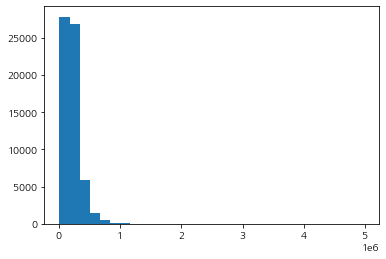

In [9]:
plt.hist(df[['totalyearlycompensation']], bins=30)

basesalary의 minimum이 0인 경우가 존재하므로 좀 더 살펴보자.

In [10]:
sum(df['totalyearlycompensation'] == df[['basesalary', 'stockgrantvalue', 'bonus']].sum(axis=1))

50198

In [11]:
sum(df['totalyearlycompensation'] != df[['basesalary', 'stockgrantvalue', 'bonus']].sum(axis=1))

12444

In [12]:
df.loc[df['totalyearlycompensation'] != df[['basesalary', 'stockgrantvalue', 'bonus']].sum(axis=1),
       ['totalyearlycompensation', 'basesalary', 'stockgrantvalue', 'bonus']]

,totalyearlycompensation,basesalary,stockgrantvalue,bonus
0,127000,107000.0,20000.0,10000.0
1,100000,0.0,0.0,0.0
2,310000,155000.0,0.0,0.0
4,157000,0.0,0.0,0.0
5,208000,0.0,0.0,0.0
...,...,...,...,...
62636,172000,142000.0,15000.0,14200.0
62638,237000,146900.0,73200.0,16000.0
62639,220000,157000.0,25000.0,20000.0
62640,280000,194688.0,57000.0,29000.0


In [13]:
sum(df['totalyearlycompensation'] > df[['basesalary', 'stockgrantvalue', 'bonus']].sum(axis=1))

6451

In [14]:
sum(df['totalyearlycompensation'] < df[['basesalary', 'stockgrantvalue', 'bonus']].sum(axis=1))

5993

어떤 부분에 문제가 있는지 찾기 어려우므로 totalyearlycompensation를 타겟 변수로 이용하겠다.

#### 회사 이름 (company)

In [15]:
# 회사 개수
df['company'].nunique()

1631

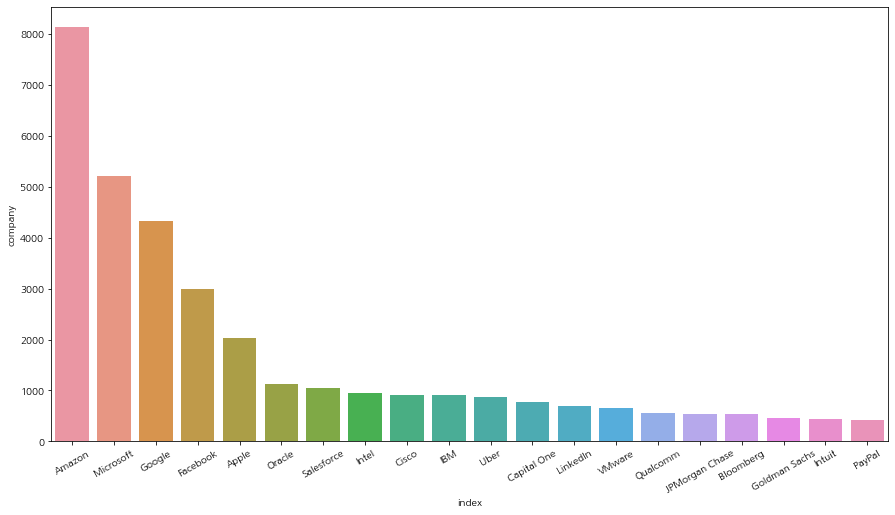

In [16]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=df['company'].value_counts().head(20).to_frame().reset_index(), x='index', y='company')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

특정 회사들에 데이터가 몰려있다.

In [17]:
dff = df.groupby(['company']).mean().sort_values(by=['totalyearlycompensation'], axis=0, ascending=False).reset_index()
dff2 = df.groupby(['company']).count().timestamp.reset_index().rename({'timestamp':'count'}, axis=1)
dff = pd.merge(dff, dff2, on=['company'], how='left')

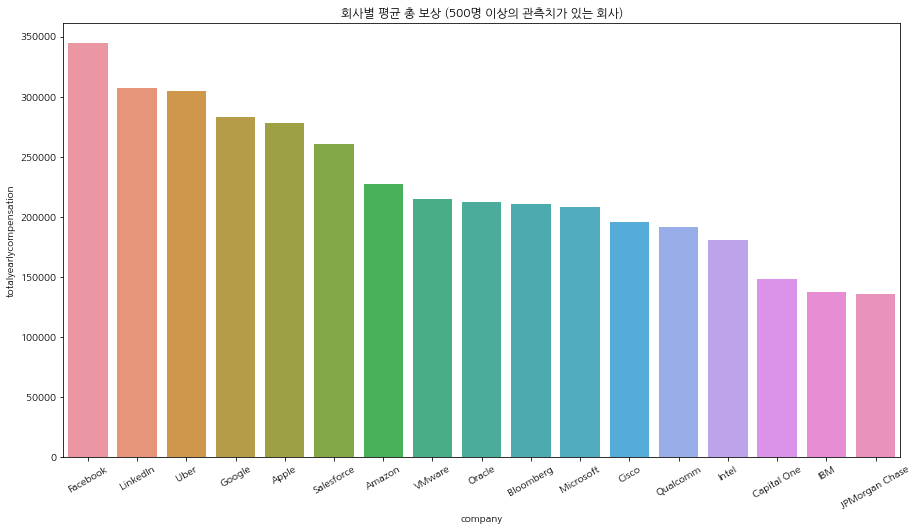

In [18]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=dff[dff['count']>500].head(20), x='company', y='totalyearlycompensation')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title("회사별 평균 총 보상 (500명 이상의 관측치가 있는 회사)")
plt.show()

#### 직급 (level)

In [19]:
df['level'].nunique()

2923

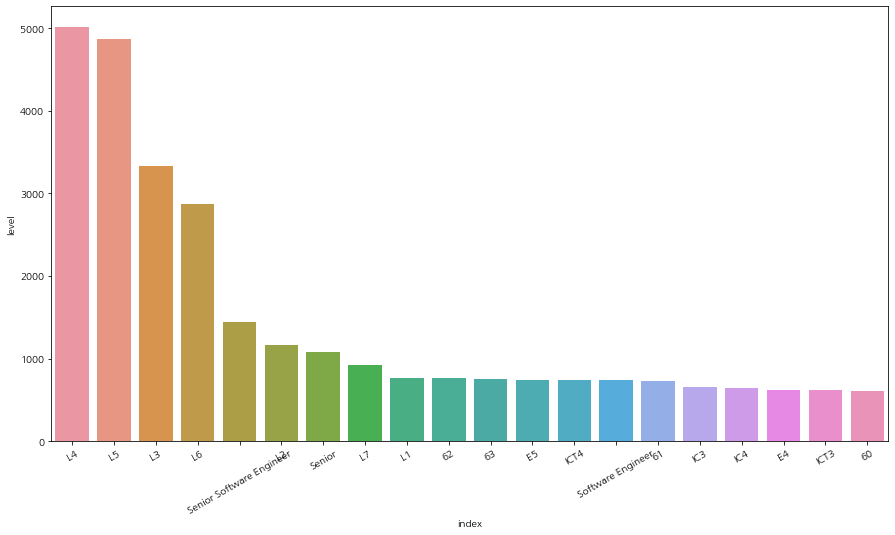

In [20]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=df['level'].value_counts().head(20).to_frame().reset_index(), x='index', y='level')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

직급들 또한 편차가 심하다.

In [21]:
df['level'].unique()[:100]

array(['L3', 'SE 2', 'L7', 'M1', '60', '63', '65', '62', '59', '9',
       'Sde 2', 'L6', 'L5', 'E3', '5a', 'L4', '64', 'IC4', '67', 'Ict3',
       'T6', 'Senior Software Engineer', 'ICT2', 'ICT3', 'Senior', '66',
       '69', 'Senior Software Engineer 2 (5b)',
       'Senior Member of Technical Staff', 'IC2', 'Lead MTS', 'E4',
       'Software Engineer', '5', 'SDE 3', 'Director', 'Staff', 'ICT5',
       'ICT - 5', 'L8', 'Senior Principal', 'ICT4', 'E6',
       'Senior Software Engineer I', 'E5', 'G6', '61', 'T3', 'T5', 'L2',
       'Product Manager', 'Software Engineer 3', 'New Grad', 'T2', 'T4PF',
       '6', '4', 'MTS 3', 'Software engineer', 'T7', 'G03', 'LMTS', 'IC3',
       'SDE II', 'L2 (new grad)', 'Staff Engineer II', 'Ic5',
       'Software Engineer(SWE)', 'MTS1', '7', 'Non-senior', 'IC5',
       'Research Scientist', '27', 'L7 Principal', 'senior',
       'New Grad (ICT2)', 'e6', 'Grade 11', 'Staff Engineer',
       'Senior (P3)', 'SDE II (61)', 'MTS 1', 'Senior SDE', 'Swe2'

회사 별로 직급이 다르긴 하지만, 동일한 직급도 다양한 이름으로 기입되어 있어 정리가 필요하다.

In [22]:
dff = df.groupby(['level']).mean().sort_values(by=['totalyearlycompensation'], axis=0, ascending=False).reset_index()
dff2 = df.groupby(['level']).count().timestamp.reset_index().rename({'timestamp':'count'}, axis=1)
dff = pd.merge(dff, dff2, on=['level'], how='left')

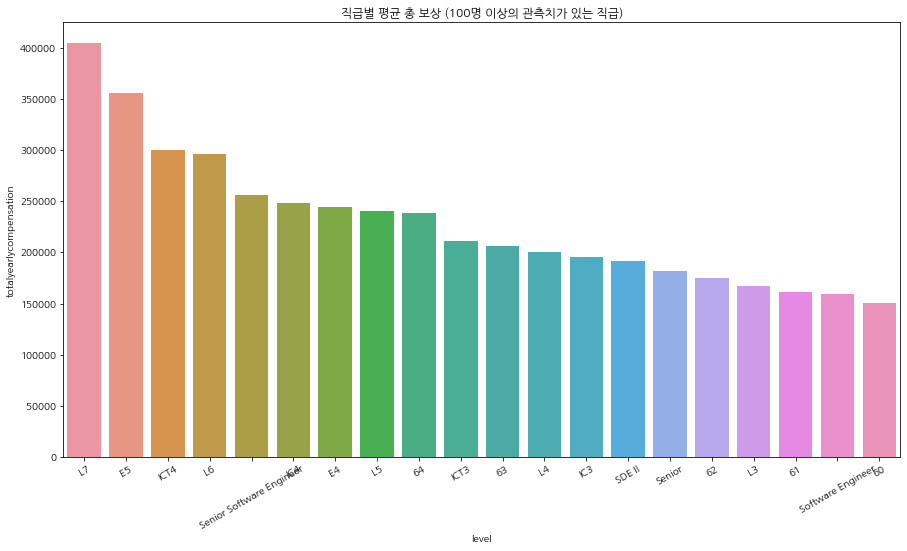

In [23]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=dff[dff['count']>500].head(20), x='level', y='totalyearlycompensation')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title("직급별 평균 총 보상 (100명 이상의 관측치가 있는 직급)")
plt.show()

#### 직무 (title)

In [24]:
df['title'].nunique()

15

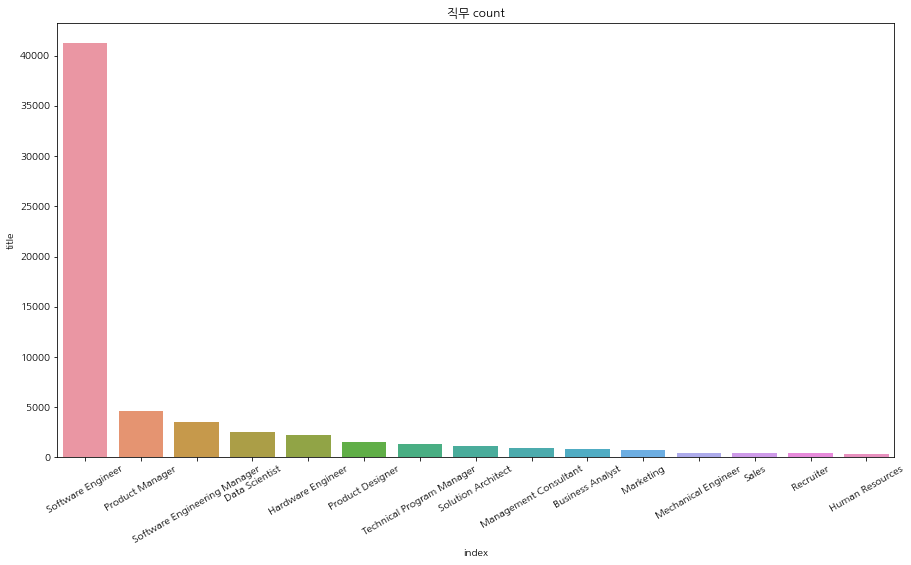

In [25]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=df['title'].value_counts().to_frame().reset_index(), x='index', y='title')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('직무 count')
plt.show()

거의 software engineer에 대한 데이터이다.

In [26]:
dff = df.groupby(['title']).mean().sort_values(by=['totalyearlycompensation'], axis=0, ascending=False).reset_index()
dff2 = df.groupby(['title']).count().timestamp.reset_index().rename({'timestamp':'count'}, axis=1)
dff = pd.merge(dff, dff2, on=['title'], how='left')

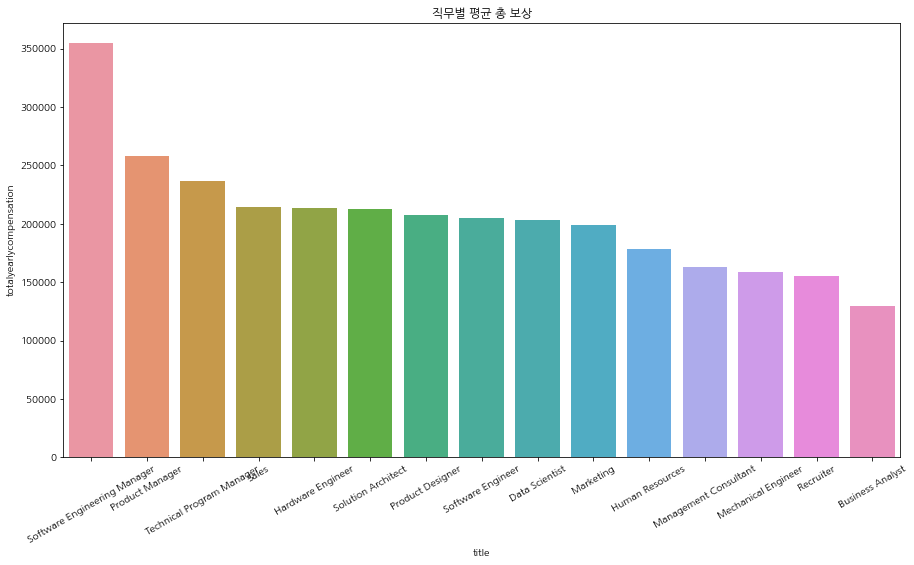

In [27]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=dff, x='title', y='totalyearlycompensation')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title("직무별 평균 총 보상")
plt.show()

#### 성별 (gender)

In [28]:
df['gender'].value_counts()

Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

In [29]:
# missing 개수
df.gender.isna().sum()

19540

잘못된 데이터가 보이므로 missing으로 처리하겠다.

In [30]:
df.loc[df['gender'] == 'Title: Senior Software Engineer', 'gender'] = np.nan

In [31]:
df['gender'].value_counts()

Male      35702
Female     6999
Other       400
Name: gender, dtype: int64

In [32]:
dff = df.groupby(['gender']).mean().sort_values(by=['totalyearlycompensation'], axis=0, ascending=False).reset_index()
dff2 = df.groupby(['gender']).count().timestamp.reset_index().rename({'timestamp':'count'}, axis=1)
dff = pd.merge(dff, dff2, on=['gender'], how='left')

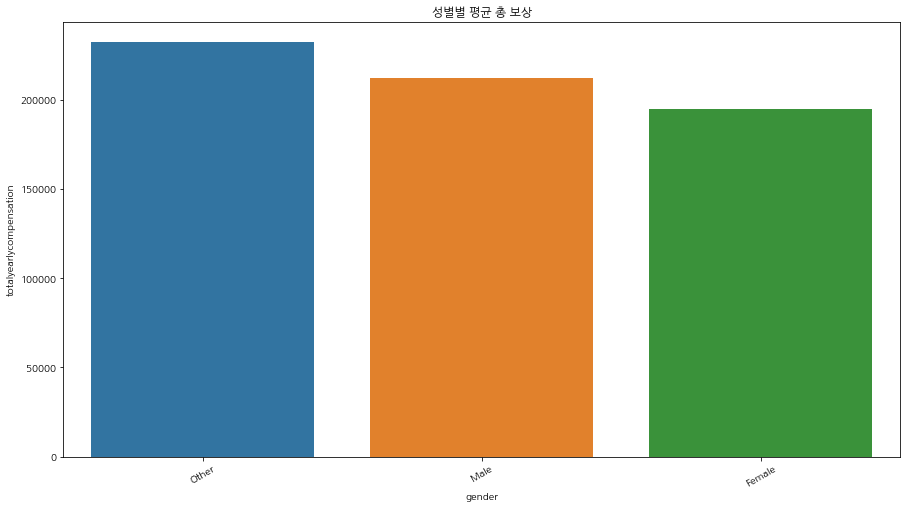

In [33]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=dff, x='gender', y='totalyearlycompensation')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title("성별별 평균 총 보상")
plt.show()

#### 인종 (Race)

In [34]:
df['Race'].value_counts()

Asian          11772
White           8032
Hispanic        1129
Two Or More      804
Black            690
Name: Race, dtype: int64

In [35]:
# missing 개수
df.Race.isna().sum()

40215

In [36]:
dff = df.groupby(['Race']).mean().sort_values(by=['totalyearlycompensation'], axis=0, ascending=False).reset_index()
dff2 = df.groupby(['Race']).count().timestamp.reset_index().rename({'timestamp':'count'}, axis=1)
dff = pd.merge(dff, dff2, on=['Race'], how='left')

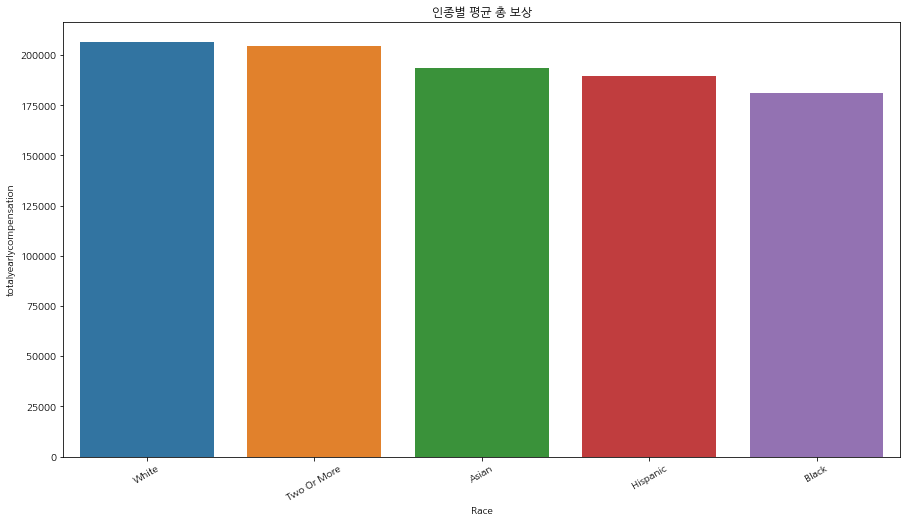

In [37]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=dff, x='Race', y='totalyearlycompensation')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title("인종별 평균 총 보상")
plt.show()

인종간 급여의 차이가 살짝 보인다.

#### 학력 (Education)

In [38]:
df['Education'].value_counts()

Master's Degree      15391
Bachelor's Degree    12601
PhD                   1703
Some College           355
Highschool             320
Name: Education, dtype: int64

In [39]:
df['Education'].isna().sum()/df.shape[0]

0.5151815076146994

50% 이상의 결측치 존재

In [40]:
dff = df.groupby(['Education']).mean().sort_values(by=['totalyearlycompensation'], axis=0, ascending=False).reset_index()
dff2 = df.groupby(['Education']).count().timestamp.reset_index().rename({'timestamp':'count'}, axis=1)
dff = pd.merge(dff, dff2, on=['Education'], how='left')

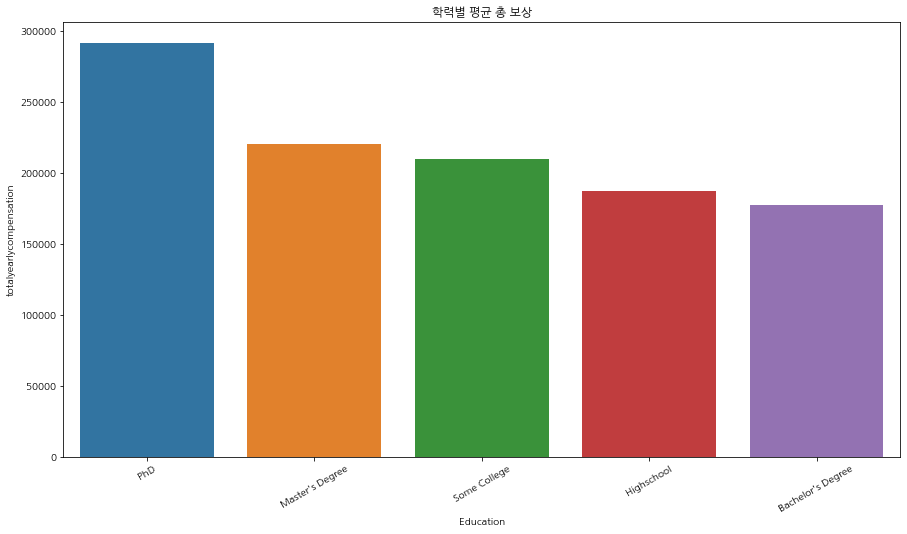

In [41]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=dff, x='Education', y='totalyearlycompensation')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title("학력별 평균 총 보상")
plt.show()

학력에 의한 차이가 크므로 결측치가 있더라도 정보를 사용하는 것이 좋을 것 같다.

### 데이터가 매우 방대하고, 매우 적은 케이스는 학습이 어렵고 예측하는 데 의미가 없으므로 관측치가 가장 많은 TOP 5 기업에 대해서만 분석하겠다

In [42]:
df_new = df[df['company'].isin(df['company'].value_counts().head(5).index)].reset_index(drop=True)

In [43]:
df_new['company'].unique()

array(['Amazon', 'Apple', 'Microsoft', 'Facebook', 'Google'], dtype=object)

### 데이터 전처리

In [44]:
df_new.isnull().sum()

timestamp                      0
company                        0
level                          1
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          494
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                      7044
otherdetails                9262
cityid                         0
dmaid                          0
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       15320
Education                  12452
year                           0
month     

### 결측치 있는 것 : level, tag, gender, otherdetails, race, education

- 인종

인종 missing data 확인 - asian & hispanic 빼놓고 없음

In [45]:
df_new.loc[df_new[['Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic']].sum(axis=1) != 1, 'Race']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
22685    NaN
22686    NaN
22687    NaN
22688    NaN
22689    NaN
Name: Race, Length: 15320, dtype: object

In [46]:
df_new.loc[df_new[['Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic']].sum(axis=1) != 1 & 
           df_new['Race'].notnull()]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,year,month


Race의 결측치를 채우는 대신, 이미 원핫인코딩 된 변수를 사용하여 결측치로 인한 문제를 피하겠다.

- 학력

In [47]:
Education_var = ['Masters_Degree','Bachelors_Degree','Doctorate_Degree','Highschool','Some_College']

In [48]:
df_new.loc[df_new[Education_var].sum(axis=1) != 1 & df_new['Education'].notnull(), Education_var + ['Education']]

,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Education
5857,1,0,1,0,0,Master's Degree
5860,1,0,1,0,0,Master's Degree
6082,1,0,1,0,0,Master's Degree
6148,1,0,1,0,0,Master's Degree
6180,1,0,1,0,0,Master's Degree
6274,1,0,1,0,0,Master's Degree
6423,1,0,1,0,0,Master's Degree
6435,1,0,1,0,0,Master's Degree
6497,1,0,1,0,0,Master's Degree
6532,1,0,1,0,0,Master's Degree


In [49]:
df_new.loc[(df_new['Masters_Degree']==1) & (df_new['Bachelors_Degree']==1), 'Bachelors_Degree'] = 0

Master와 Doctor/Bachelor가 모두 있는 경우 Master로 표기됨. 마찬가지로, 결측치를 채우는 대신, 이미 원핫인코딩 된 변수를 사용하여 결측치로 인한 문제를 피하겠다.

- 성별 (gender)

In [50]:
df_new['gender'].value_counts()

Male      12998
Female     2531
Other       117
Name: gender, dtype: int64

성별에 따른 차이가 있을 것이므로 NA를 또다른 그룹으로 취급하여 분석하자.

- tag, otherdetails

In [51]:
df_new['tag'].isna().sum()

494

In [52]:
df_new['tag'].value_counts()

Distributed Systems (Back-End)    4451
Full Stack                        3752
ML / AI                           2066
API Development (Back-End)        2003
Web Development (Front-End)        770
                                  ... 
Technical Account Manager            1
Google Store                         1
Satellite Avionics                   1
gTech                                1
Data and Applied Scinece             1
Name: tag, Length: 1306, dtype: int64

In [53]:
df_new['tag'].nunique()

1306

결측치가 많고 범주가 매우 많으므로 일단 보류

In [54]:
df_new['otherdetails'].value_counts()

Masters                                                                      1553
Title: Software Engineer                                                      505
Race: Asian, Academic Level: Master’s degree                                  414
Race: White, Academic Level: Bachelor’s degree                                325
Race: Asian, Academic Level: Bachelor’s degree                                302
                                                                             ... 
Title: Sr Applied Scientist, Race: Asian, Academic Level: Doctorate (PhD)       1
40k joining bonus                                                               1
Title: Principal Sde, Race: White, Academic Level: Master’s degree              1
Ab                                                                              1
Stock: €190000 4 years vesting                                                  1
Name: otherdetails, Length: 4549, dtype: int64

- 직급(level)

In [55]:
df_new['level'].value_counts()

L5                     3581
L4                     3078
L6                     2101
L3                     1302
62                      756
                       ... 
APM1                      1
Director of Product       1
L6.5                      1
Partner                   1
L5 security               1
Name: level, Length: 325, dtype: int64

In [56]:
df_new['level'].nunique()

325

결측치 1개는 가장 많은 값으로 채움

In [57]:
df_new['level'].fillna('L5', inplace=True)

In [58]:
df_new['level'].isna().sum()

0

각 회사의 직급에 대한 정보가 부족하므로 숫자 정보를 직급 단계로 간주하고 모델에 활용한다.
또한 가장 많은 직무인 소프트웨어 엔지니어에 대해서는 levels.fyi에서 얻을 수 있는 다음 직무 정보를 활용한다.

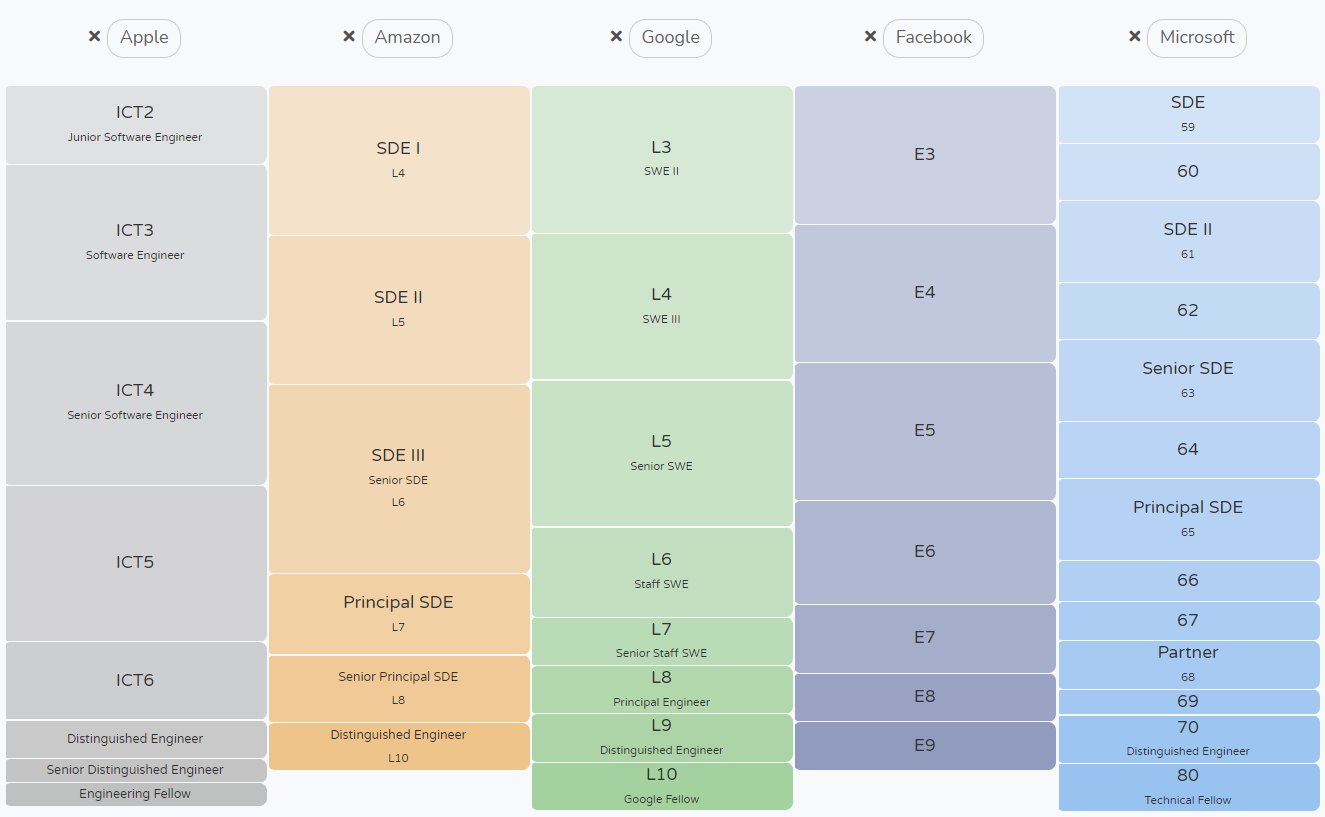

L3 ~ L10, E3 ~ E9, 59 ~ 80, ICT2 ~ 이용

- 숫자가 있으면 일단 추출

In [59]:
import re

In [60]:
def myNumber(stringVal):
    if (re.findall(r'\d+', stringVal) == []):
        return np.nan
    else:
        return int(re.findall(r'\d+', stringVal)[0])

In [61]:
level_dict = {'SDE':'4', 'SDEI':'4', 'SDEII':'5', 'SDEIII':'6', 'SeniorSDE':'6', 'PrincipalSDE':'7', 'SeniorPrincipalSDE':'8',
              'DistinguisedEngineer':'70', 'Partner':'68', 'TechnicalFellow':'80',
              'SeniorDistinguishedEngineer':'10','EngineeringFellow':'10',
              'JuniorSoftwareEngineer':'2', 'SoftwareEngineer':'3', 'SeniorSoftwareEngineer':'4',
              'SWEII':'3', 'SWEIII':'4', 'SeniorSWE':'5', 'StaffSWE':'6','SeniorStaffSWE':'7','PrincipalEngineer':'8',
              'DistinguisedEngineer':'9','GoogleFellow':'10'
             }

In [62]:
df_new['new_level'] = df_new['level'].apply(lambda x : x.replace(" ", ""))
df_new = df_new.replace({'new_level':level_dict})

In [63]:
df_new['new_level'] = df_new['new_level'].apply(myNumber)

In [64]:
df_new['new_level'].fillna(5, inplace=True) # 결측치는 가장 많은 5로 채움

In [65]:
df_new.loc[df_new['new_level']>50,'new_level'].value_counts()

62.0    791
63.0    772
61.0    766
60.0    641
64.0    618
59.0    580
65.0    405
66.0    218
67.0    110
68.0     16
58.0      7
69.0      4
57.0      3
70.0      2
80.0      1
52.0      1
56.0      1
54.0      1
Name: new_level, dtype: int64

In [66]:
df_new.loc[df_new['new_level']>50,'new_level'].index

Int64Index([    2,     3,     4,     5,     6,     7,     9,    10,    15,
               16,    19,    20,    22,    29,    31,    32,    49,    52,
               53,    59,    66,    73,    80,    81,    83,    88,    90,
               98,   106,   108,   112,   114,   115,   132,   133,   143,
              144,   145,   151,   157,   164,   166,   168,   170,   182,
              185,   188,   195,   196,   200,   201,   209,   216,   219,
              221,   223,   224,   225,   228,   229,   232,   233,   234,
              238,   240,   242,   246,   248,   251,   255,   264,   268,
              271,   275,   280,   285,   290,   299,   300,   303,   308,
              314,   318,   319,   326,   327,   329,   332,   345,   347,
              350,   353,   358,   365,   366,   373,   374,   375,   378,
              379,   380,   382,   383,   388,   394,   397,   413,   415,
              420,   430,   433,   435,   436,   438,   440,   441,   444,
              448,   449,

58 이하는 0으로, 59부터 2로 간주
80은 71로 간주

In [67]:
for i in df_new.loc[df_new['new_level']>50,'new_level'].index:
    if df_new.loc[i,'new_level'] >= 80:
        df_new.loc[i,'new_level'] = 14
    elif df_new.loc[i,'new_level'] <= 58:
        df_new.loc[i,'new_level'] = 0
    else: df_new.loc[i,'new_level'] = df_new.loc[i,'new_level'] - 57

In [68]:
df_new.loc[df_new['new_level']==32,'new_level'] = 5

In [69]:
df_new['new_level'].value_counts()

5.0     6403
4.0     5986
6.0     3868
3.0     3072
7.0     1363
2.0      952
8.0      465
9.0      224
1.0      199
10.0     118
11.0      18
0.0       15
12.0       4
13.0       2
14.0       1
Name: new_level, dtype: int64

In [70]:
df_new['new_level'].isna().sum()

0

In [71]:
df_new.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education',
       'year', 'month', 'new_level'],
      dtype='object')

### 범주형 변수 확인

In [72]:
df_new['location'].value_counts()

Seattle, WA                  6312
Redmond, WA                  2596
Mountain View, CA            1408
Cupertino, CA                1407
Menlo Park, CA               1365
                             ... 
Brazil, IN                      1
Valdosta, GA                    1
Auckland, AU, New Zealand       1
Torrance, CA                    1
Kaneohe, HI                     1
Name: location, Length: 296, dtype: int64

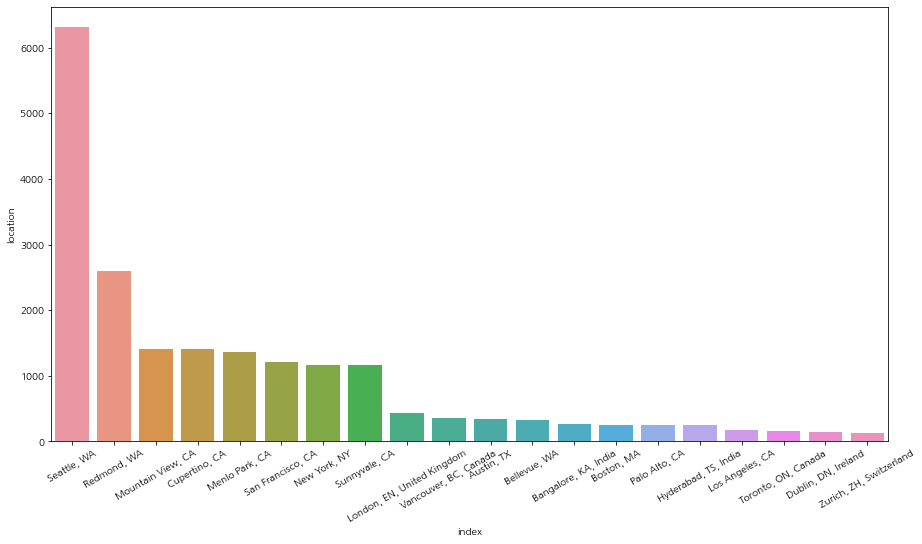

In [73]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=df_new['location'].value_counts().head(20).to_frame().reset_index(), x='index', y='location')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

1000개 이상 지역만 살리고 나머지는 other로 간주

In [74]:
df_new.loc[df_new['location'].isin(df_new['location'].value_counts().head(8).index)==False, 'location'] = 'other'

In [75]:
df_new['location'].value_counts()

Seattle, WA          6312
other                6073
Redmond, WA          2596
Mountain View, CA    1408
Cupertino, CA        1407
Menlo Park, CA       1365
San Francisco, CA    1209
New York, NY         1163
Sunnyvale, CA        1157
Name: location, dtype: int64

In [76]:
df_new['title'].value_counts()

Software Engineer               14537
Product Manager                  2073
Software Engineering Manager     1412
Data Scientist                    825
Technical Program Manager         768
Hardware Engineer                 739
Product Designer                  557
Solution Architect                512
Marketing                         289
Business Analyst                  234
Recruiter                         214
Sales                             199
Mechanical Engineer               150
Human Resources                   136
Management Consultant              45
Name: title, dtype: int64

In [77]:
df_new.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education',
       'year', 'month', 'new_level'],
      dtype='object')

In [78]:
df_new.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,year,month,new_level
0,2017-06-11 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017,06,7.0
1,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017,06,1.0
2,2017-06-20 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017,06,3.0
3,2017-06-21 17:27:47,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.5,NaN,0.0,0.0,0.0,NaN,NaN,11527,819.0,11,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017,06,6.0
4,2017-06-22 12:37:51,Microsoft,65,Software Engineering Manager,300000,"Redmond, WA",15.0,11.0,NaN,180000.0,65000.0,55000.0,NaN,NaN,11521,819.0,12,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017,06,8.0


## 학력 ordinal 인코딩 추가

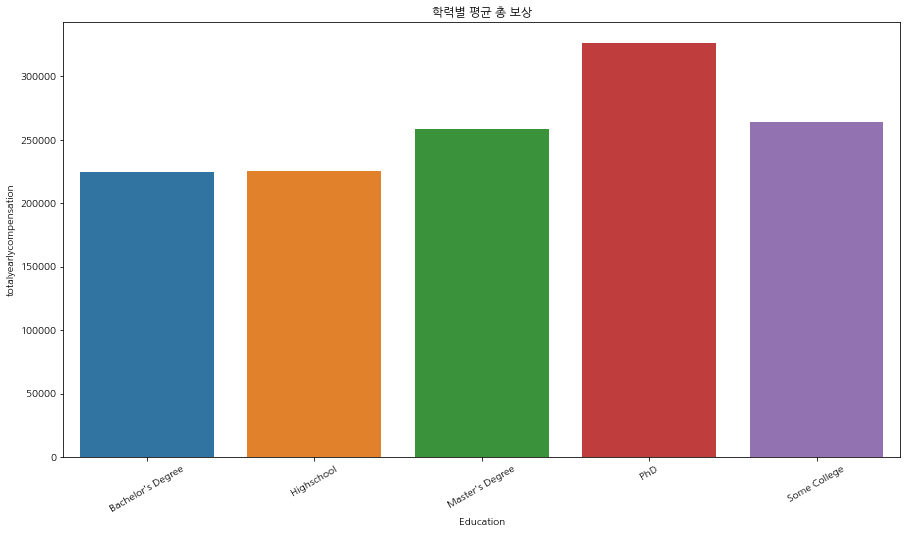

In [79]:
dff = df_new.groupby(['Education']).mean().reset_index()

plt.figure(figsize = (15,8))
ax = sns.barplot(data=dff, x='Education', y='totalyearlycompensation')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title("학력별 평균 총 보상")
plt.show()

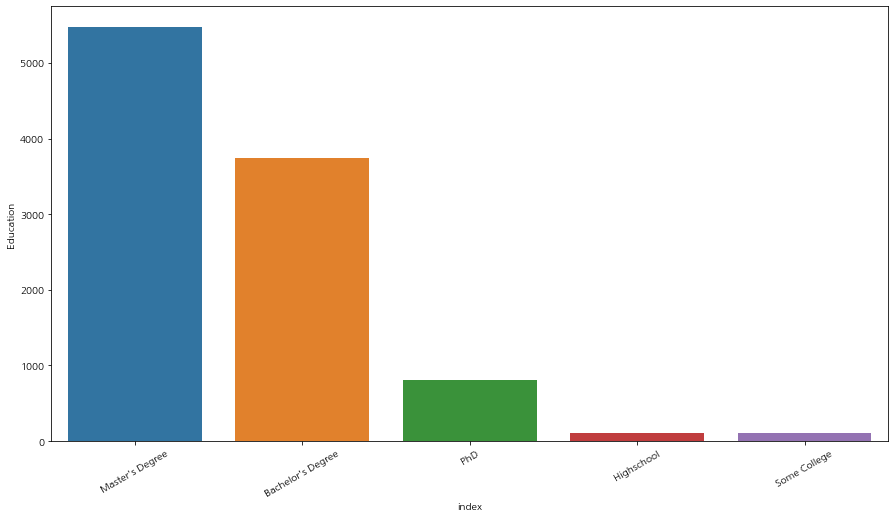

In [80]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=df_new['Education'].value_counts().to_frame().reset_index(), x='index', y='Education')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

Doctor 5 Master 4 Bachelor 3 College 2 highschool 1

missing = 4

In [81]:
df_new['new_edu'] = 4

df_new.loc[df_new['Doctorate_Degree'] == 1, 'new_edu'] = 5
df_new.loc[df_new['Bachelors_Degree'] == 1, 'new_edu'] = 3
df_new.loc[df_new['Some_College'] == 1, 'new_edu'] = 2
df_new.loc[df_new['Highschool'] == 1, 'new_edu'] = 1

In [82]:
df_new.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education',
       'year', 'month', 'new_level', 'new_edu'],
      dtype='object')

In [83]:
used_var = ['totalyearlycompensation','year','company','new_level','title','location',
            'yearsofexperience', 'yearsatcompany','gender',
            'Masters_Degree','Bachelors_Degree','Doctorate_Degree','Highschool','Some_College',
            'Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic']


df_prepro = df_new[used_var]

In [84]:
'''used_var = ['totalyearlycompensation','year','company','new_level','title','location','gender',
            'new_edu', 'Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic']


df_prepro = df_new[used_var]'''

"used_var = ['totalyearlycompensation','year','company','new_level','title','location','gender',\n            'new_edu', 'Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic']\n\n\ndf_prepro = df_new[used_var]"

앞서 gender는 그냥 other로 결측치 채움

In [85]:
df_prepro['gender'].fillna('Other', inplace=True)

C:\Users\kkang\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [86]:
df_prepro['gender'].value_counts()

Male      12998
Other      7161
Female     2531
Name: gender, dtype: int64

## 인코딩

모두 범주형 변수이므로 모델을 돌리기 위해 인코딩이 필요하다.

원핫 인코딩 : company, location, title

race, education은 이미 원핫 인코딩된 변수가 존재하고, level은 ordinal encoding 형태로 생성된 new_level을 사용한다.

In [87]:
df_prepro = pd.get_dummies(data = df_prepro, columns = ['company', 'location', 'title', 'gender'])

In [88]:
df_prepro.head()

,totalyearlycompensation,year,new_level,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,company_Amazon,company_Apple,company_Facebook,company_Google,company_Microsoft,"location_Cupertino, CA","location_Menlo Park, CA","location_Mountain View, CA","location_New York, NY","location_Redmond, WA","location_San Francisco, CA","location_Seattle, WA","location_Sunnyvale, CA",location_other,title_Business Analyst,title_Data Scientist,title_Hardware Engineer,title_Human Resources,title_Management Consultant,title_Marketing,title_Mechanical Engineer,title_Product Designer,title_Product Manager,title_Recruiter,title_Sales,title_Software Engineer,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager,gender_Female,gender_Male,gender_Other
0,310000,2017,7.0,8.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,372000,2017,1.0,7.0,5.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,157000,2017,3.0,5.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,208000,2017,6.0,8.5,8.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,300000,2017,8.0,15.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [89]:
df_prepro.isna().sum()

totalyearlycompensation               0
year                                  0
new_level                             0
yearsofexperience                     0
yearsatcompany                        0
Masters_Degree                        0
Bachelors_Degree                      0
Doctorate_Degree                      0
Highschool                            0
Some_College                          0
Race_Asian                            0
Race_White                            0
Race_Two_Or_More                      0
Race_Black                            0
Race_Hispanic                         0
company_Amazon                        0
company_Apple                         0
company_Facebook                      0
company_Google                        0
company_Microsoft                     0
location_Cupertino, CA                0
location_Menlo Park, CA               0
location_Mountain View, CA            0
location_New York, NY                 0
location_Redmond, WA                  0


## test 데이터 분리

In [117]:
X = df_prepro.drop(['totalyearlycompensation'], axis=1)
y = np.log(df_prepro[['totalyearlycompensation']])

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [119]:
y_test = np.exp(y_test)

In [120]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18152, 46) (4538, 46) (18152, 1) (4538, 1)


## 모델링

### 선형 회귀

In [121]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [123]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)
y_pred = np.exp(y_pred)

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print("LinearRegression rmse :", lin_rmse)

from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_test, y_pred)
print("LinearRegression mae :",lin_mae)

LinearRegression rmse : 98834.76186127948
LinearRegression mae : 57164.4500521857


In [124]:
pd.concat([pd.DataFrame(y_pred), y_test.reset_index(drop=True)], axis=1).head()

,0,totalyearlycompensation
0,211682.463655,228000.0
1,120317.701009,53000.0
2,344660.597747,269000.0
3,235813.084035,149000.0
4,370299.778473,320000.0


### 릿지 회귀

In [125]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=2021)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1, random_state=2021, solver='cholesky')

In [126]:
from sklearn.metrics import mean_squared_error

y_pred = ridge_reg.predict(X_test)
y_pred = np.exp(y_pred)

ridge_mse = mean_squared_error(y_test, y_pred)
ridge_rmse = np.sqrt(ridge_mse)
print("Ridge rmse :", ridge_rmse)

from sklearn.metrics import mean_absolute_error
ridge_mae = mean_absolute_error(y_test, y_pred)
print("Ridge mae :",ridge_mae)

Ridge rmse : 98840.93301825559
Ridge mae : 57163.273794172375


In [127]:
pd.concat([pd.DataFrame(y_pred), y_test.reset_index(drop=True)], axis=1).head()

,0,totalyearlycompensation
0,211690.747386,228000.0
1,120341.050196,53000.0
2,344563.270350,269000.0
3,235778.282770,149000.0
4,370217.474607,320000.0


### 라쏘 회귀

In [133]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [134]:
from sklearn.metrics import mean_squared_error

y_pred = lasso_reg.predict(X_test)
y_pred = np.exp(y_pred)

ridge_mse = mean_squared_error(y_test, y_pred)
ridge_rmse = np.sqrt(ridge_mse)
print("Lasso rmse :", ridge_rmse)

from sklearn.metrics import mean_absolute_error
ridge_mae = mean_absolute_error(y_test, y_pred)
print("Lasso mae :",ridge_mae)

Lasso rmse : 129074.90395233328
Lasso mae : 78118.79233927997


In [135]:
pd.concat([pd.DataFrame(y_pred), y_test.reset_index(drop=True)], axis=1).head()

,0,totalyearlycompensation
0,203930.538917,228000.0
1,203930.538917,53000.0
2,205493.472826,269000.0
3,195808.196039,149000.0
4,238561.878409,320000.0


### 의사결정트리 회귀

In [141]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=2021)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2021)

In [142]:
y_pred = tree_reg.predict(X_test)
y_pred = np.exp(y_pred)

tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
print("DecisionTreeRegressor rmse :", tree_rmse)

tree_mae = mean_absolute_error(y_test, y_pred)
print("DecisionTreeRegressor mae :",tree_mae)

DecisionTreeRegressor rmse : 93463.07577255645
DecisionTreeRegressor mae : 56530.32060770139


In [143]:
pd.concat([pd.DataFrame(y_pred), y_test.reset_index(drop=True)], axis=1).head()

,0,totalyearlycompensation
0,224554.991537,228000.0
1,114074.537036,53000.0
2,175000.000000,269000.0
3,230000.000000,149000.0
4,353000.000000,320000.0


### 랜덤포레스트 회귀

In [146]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=2021)
forest_reg.fit(X_train, y_train)

<ipython-input-146-b093e43b13b3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=2021)

In [147]:
y_pred = forest_reg.predict(X_test)
y_pred = np.exp(y_pred)

forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
print("RandomForestRegressor rmse :", forest_rmse)

forest_mae = mean_absolute_error(y_test, y_pred)
print("RandomForestRegressor mae :",forest_mae)

RandomForestRegressor rmse : 76705.86651376354
RandomForestRegressor mae : 44308.47583573233


In [148]:
pd.concat([pd.DataFrame(y_pred), y_test.reset_index(drop=True)], axis=1).head()

,0,totalyearlycompensation
0,225492.700397,228000.0
1,99950.344903,53000.0
2,350658.925034,269000.0
3,224942.393181,149000.0
4,379600.663422,320000.0


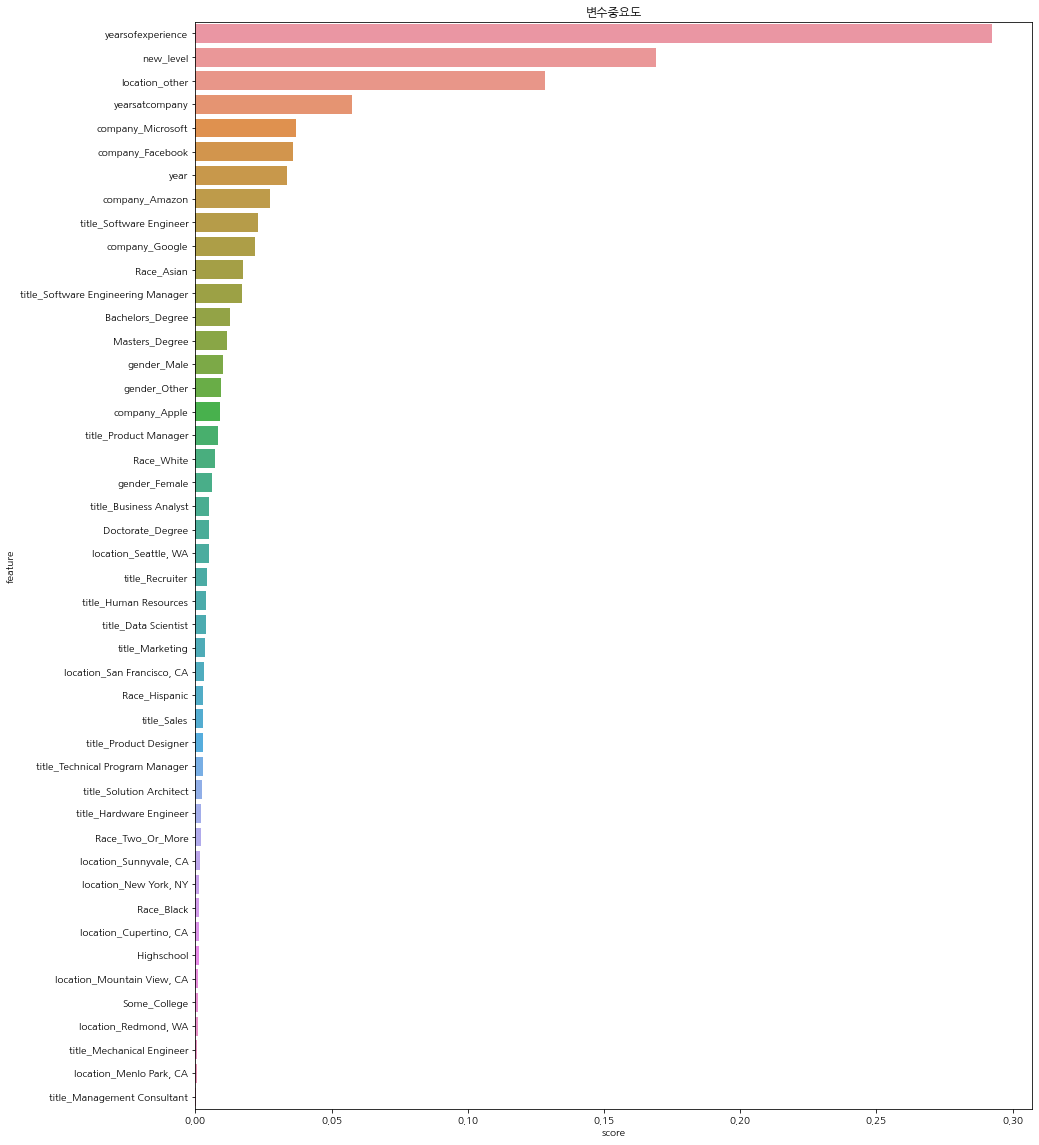

In [149]:
dff = pd.concat([pd.DataFrame(X.columns, columns=['feature']), pd.DataFrame(forest_reg.feature_importances_, columns=['score'])], axis=1)
dff = dff.sort_values(by=['score'], axis=0, ascending=False)
plt.figure(figsize = (15,20))
ax = sns.barplot(data=dff, y='feature', x='score')
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title("변수중요도")
plt.show()

In [150]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

score: [0.30517079 0.29733448 0.28525154 0.29075126 0.2811529  0.29906991
 0.29838843 0.29267422 0.2998437  0.29620606]
mean: 0.2945843295583407
sd: 0.006858309799305285


#### 그리드서치

파라미터 설명 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [151]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [10, 30, 50], 'max_features': [4, 8], 'bootstrap':[True, False], 
  'max_depth':[20, 50], 'min_samples_leaf':[10, 100]},
 ]
forest_reg = RandomForestRegressor(random_state=2021)

In [153]:
grid_rf = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error', return_train_score=True)
grid_rf.fit(X_train, y_train)

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2021),
             param_grid=[{'bootstrap': [True, False], 'max_depth': [20, 50],
                          'max_features': [4, 8], 'min_samples_leaf': [10, 100],
                          'n_estimators': [10, 30, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [154]:
final_rf = grid_rf.best_estimator_
final_rf

RandomForestRegressor(bootstrap=False, max_depth=20, max_features=8,
                      min_samples_leaf=10, n_estimators=30, random_state=2021)

In [155]:
y_pred = final_rf.predict(X_test)
y_pred = np.exp(y_pred)

gridrf_mse = mean_squared_error(y_test, y_pred)
gridrf_rmse = np.sqrt(gridrf_mse)
print("Grid RandomForest rmse :", gridrf_rmse)

gridrf_mae = mean_absolute_error(y_test, y_pred)
print("Grid RandomForest mae :",gridrf_mae)

Grid RandomForest rmse : 85148.8994080274
Grid RandomForest mae : 46946.655817707324


In [156]:
pd.concat([pd.DataFrame(y_pred), y_test.reset_index(drop=True)], axis=1).head()

,0,totalyearlycompensation
0,209874.122096,228000.0
1,103109.820667,53000.0
2,374302.295831,269000.0
3,210192.764139,149000.0
4,360970.810700,320000.0


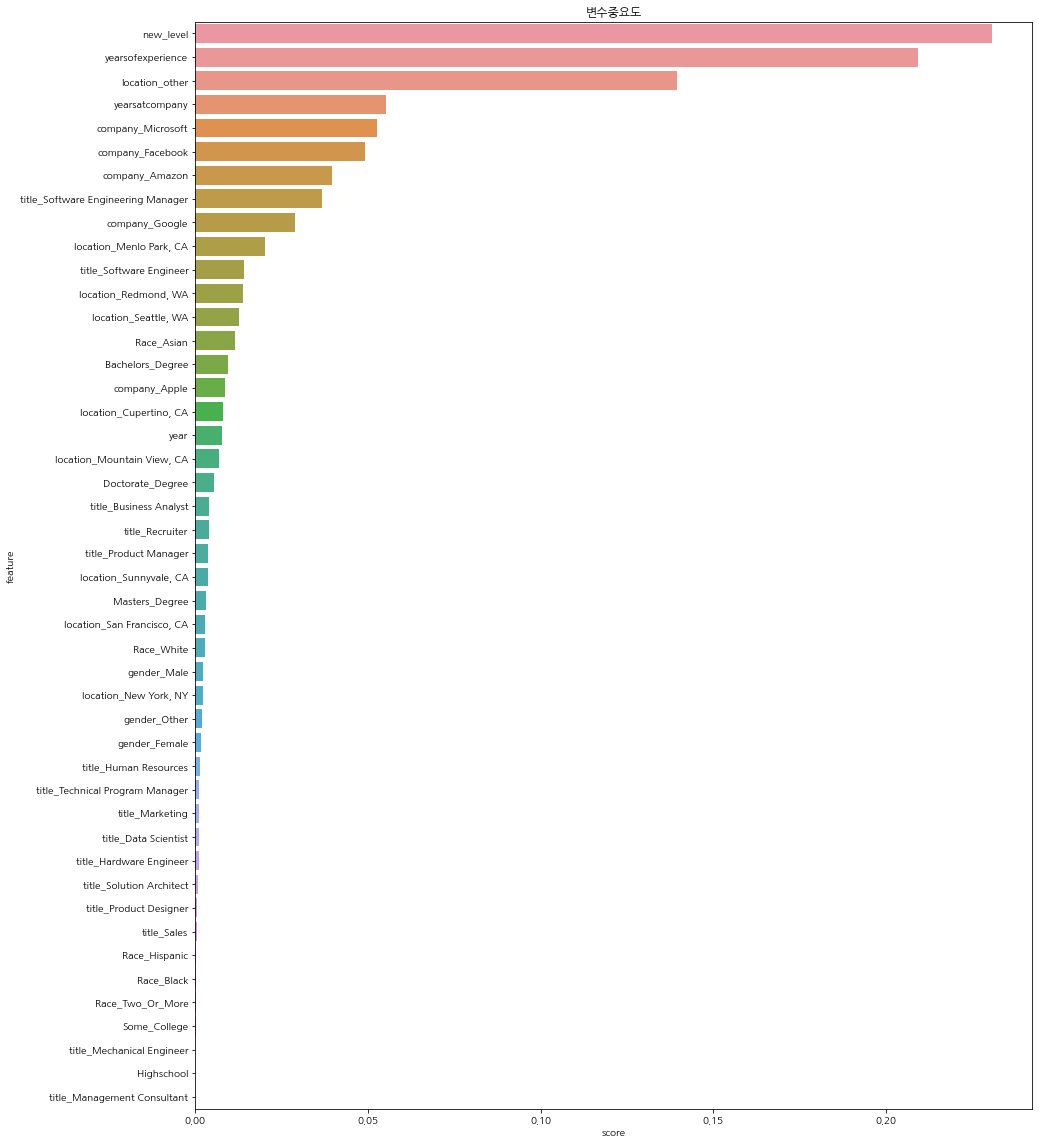

In [157]:
dff = pd.concat([pd.DataFrame(X.columns, columns=['feature']), pd.DataFrame(final_rf.feature_importances_, columns=['score'])], axis=1)
dff = dff.sort_values(by=['score'], axis=0, ascending=False)
plt.figure(figsize = (15,20))
ax = sns.barplot(data=dff, y='feature', x='score')
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title("변수중요도")
plt.show()

In [158]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_rf, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

score: [0.31261645 0.29489482 0.29307312 0.29124105 0.28694169 0.29429152
 0.30054133 0.30843753 0.28888816 0.30430753]
mean: 0.2975233199140279
sd: 0.00815609156933854


### SVM 회귀

In [161]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(random_state=2021)
svm_reg.fit(X_train, y_train)

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(random_state=2021)

In [162]:
y_pred = svm_reg.predict(X_test)
y_pred = np.exp(y_pred)

svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = np.sqrt(svm_mse)
print("SVM rmse :", svm_rmse)

svm_mae = mean_absolute_error(y_test, y_pred)
print("SVM mae :",svm_mae)

SVM rmse : 106840.50271639256
SVM mae : 63583.7843227594


In [163]:
pd.concat([pd.DataFrame(y_pred), y_test.reset_index(drop=True)], axis=1).head()

,0,totalyearlycompensation
0,231214.691563,228000.0
1,163322.431870,53000.0
2,303013.480853,269000.0
3,224396.482028,149000.0
4,333342.815975,320000.0


In [164]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X_train, y_train)

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=100, degree=2, kernel='poly')

In [165]:
y_pred = svm_poly_reg.predict(X_test)
y_pred = np.exp(y_pred)

svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)
print("SVR rmse :", svr_rmse)

svr_mae = mean_absolute_error(y_test, y_pred)
print("SVR mae :",svr_mae)

SVR rmse : 118274.20801453157
SVR mae : 68727.2702957108


In [166]:
pd.concat([pd.DataFrame(y_pred), y_test.reset_index(drop=True)], axis=1).head()

,0,totalyearlycompensation
0,212810.661590,228000.0
1,184711.730506,53000.0
2,246768.512701,269000.0
3,203339.051847,149000.0
4,272552.791424,320000.0


### 그래디언트 부스팅

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [167]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1.0, random_state=2021)
gbrt.fit(X_train, y_train)

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(learning_rate=1.0, max_depth=2, random_state=2021)

In [168]:
y_pred = gbrt.predict(X_test)
y_pred = np.exp(y_pred)

gbr_mse = mean_squared_error(y_test, y_pred)
gbr_rmse = np.sqrt(gbr_mse)
print("GBR rmse :", gbr_rmse)

gbr_mae = mean_absolute_error(y_test, y_pred)
print("GBR mae :",gbr_mae)

GBR rmse : 94604.23337462045
GBR mae : 45777.71386895905


In [169]:
pd.concat([pd.DataFrame(y_pred), y_test.reset_index(drop=True)], axis=1).head()

,0,totalyearlycompensation
0,214126.988008,228000.0
1,102896.313045,53000.0
2,372873.569560,269000.0
3,249548.081451,149000.0
4,374208.843956,320000.0


#### 그리드서치

In [170]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'max_depth': [2, 5, 10], 'n_estimators': [50, 100, 200], 'learning_rate':[0.5, 1, 10]},
]
gbrt = GradientBoostingRegressor(random_state=2021)

In [171]:
grid_gbr = GridSearchCV(gbrt, param_grid, cv=5,
 scoring='neg_mean_squared_error', return_train_score=True)
grid_gbr.fit(X_train, y_train)

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: Runtim

C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: ov

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: Runtim

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: Runtim

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: Runtim

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: Runtim

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: Runtim

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: Runtim

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: over

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: over

C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: ov

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:338: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\kkan

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:338: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:338: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kkang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Us

C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:338: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:338: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\kkang\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-9.07569072e-002 -8.63880189e-002 -8.34093298e-002 -8.24514722e-002
 -8.40451509e-002 -8.70019488e-002 -1.01424272e-

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=2021),
             param_grid=[{'learning_rate': [0.5, 1, 10],
                          'max_depth': [2, 5, 10],
                          'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [172]:
final_gbr = grid_gbr.best_estimator_
final_gbr

GradientBoostingRegressor(learning_rate=0.5, max_depth=5, n_estimators=50,
                          random_state=2021)

In [173]:
y_pred = final_gbr.predict(X_test)
y_pred = np.exp(y_pred)

gridgbr_mse = mean_squared_error(y_test, y_pred)
gridgbr_rmse = np.sqrt(gridgbr_mse)
print("Grid GBR rmse :", gridgbr_rmse)

gridgbr_mae = mean_absolute_error(y_test, y_pred)
print("Grid GBR mae :",gridgbr_mae)

Grid GBR rmse : 77688.92450818905
Grid GBR mae : 43598.30780340683


In [174]:
pd.concat([pd.DataFrame(y_pred), y_test.reset_index(drop=True)], axis=1).head()

,0,totalyearlycompensation
0,204606.055562,228000.0
1,105443.716492,53000.0
2,368869.858095,269000.0
3,224866.380419,149000.0
4,364475.604087,320000.0
